<a href="https://colab.research.google.com/github/amrrahman1/Regression-Tree-Exercise-Practice-/blob/main/Regression_Tree_excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
path = '/content/drive/MyDrive/Boston_Housing_from_Sklearn (1).csv'
df = pd.read_csv(path)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


LSTAT correlation to price = -0.74,
PTRATIO correlation to price = 0.51, 
Rm correlation to price = 0.7

In [36]:
#2) Selecting X and y

X=df.drop(columns=['PRICE'])
y= df['PRICE']

In [37]:
#3) Splitting the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
#Regression Tree Exercise (Practice)
# 1) Run a regression tree model with default parameters (unlimited depth)
# Importing :

from sklearn.tree import DecisionTreeRegressor


In [39]:
# Instinsiate the model
dec_tree = DecisionTreeRegressor(random_state = 42)

In [40]:
# Fitting the model
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [41]:
# Evaluating the model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.6193230918136841


In [42]:
# Getting the nodes
dec_tree.get_depth()

20

In [43]:
#  getting values for max_depth and determine the optimal value based on the highest r2
max_depth_range = list(range(2, 20))

r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

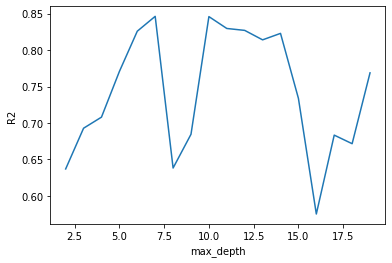

In [44]:
# plotting to find the higest r2

import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

Highest r2 is 10

In [45]:
# getting the r2 for the model with the optimal (max depth)

dec_tree_10 = DecisionTreeRegressor(max_depth = 10, random_state = 42)
dec_tree_10.fit(X_train, y_train)
train_10_score = dec_tree_10.score(X_train, y_train)
test_10_score = dec_tree_10.score(X_test, y_test)
print(train_10_score)
print(test_10_score)

0.9867962386381032
0.8460104271509634


Ensemble Trees Exercise (Core) :

In [46]:
#1) Run a regression tree model with default parameters (unlimited depth)
# Performing Bagged Trees Regression :
# importing :

from sklearn.ensemble import BaggingRegressor


In [47]:
# Instinsiate the model
bagreg = BaggingRegressor(random_state = 42)

In [48]:
# Fitting teh model
bagreg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [49]:
# Evaluating the Bagged Trees model
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9606756023782893
0.8204208271364619


In [50]:
# 2) Perform a Random forest regression
# Importing :

from sklearn.ensemble import RandomForestRegressor

In [51]:
# Instinsiate the model
rf = RandomForestRegressor(random_state = 42)

In [52]:
# Fitting the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [53]:
# Evalutaing the Random forrest model :
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9771342521069045
0.8338530730048258
